In [1]:
#https://github.com/ymdong/MLND-Online-News-Popularity-Prediction/blob/master/Popular%20News.ipynb
#https://github.com/zshanabek/online-news-popularity-ml/blob/master/scripts/preprocessing.py
#https://github.com/susobhang70/OnlineNewsPopularity
#https://algorithmia.com/tags/machine%20learning
#https://github.com/ymdong/MLND-Online-News-Popularity-Prediction/blob/master/Popular%20News.ipynb
#https://github.com/xuwu0922/Online-News-Popularity/blob/master/scripts/changeTest.py
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix  

In [45]:
data = pd.read_csv("OnlineNewsPopularity.csv",sep='\s*,\s*',engine="python")
data


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [46]:
display(data.head())

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [47]:
# print(data.nunique())

In [6]:
#viewing the target attribute.
Target_attribute=data.iloc[:,-1]

In [7]:
# Target_attribute

In [8]:
# data.describe()

Binarization - 
We have binarized the data into two categories, "unpopular" or "popular" news articles. The median of the shares as can be seen from the descriptive analysis is 1400, so we set our threshold to be 1400 shares. 


In [48]:
le=preprocessing.LabelEncoder()
popular_news_label=pd.Series(le.fit_transform(data.iloc[:,-1]>=1400))

In [10]:
# popular_news_label

In [49]:
data["labels"]=popular_news_label

In [50]:
data.drop(["url","shares"], axis=1, inplace=True,errors="ignore")

In [51]:
print(len(data.columns.tolist()))

60


In [52]:
X=data.iloc[:,:-1]

In [53]:
y=data.iloc[:,-1]

Normalization

In [16]:
#https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
Normalized=X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled=min_max_scaler.fit_transform(Normalized)
Normalized_X=pd.DataFrame(x_scaled)



In [55]:
def feature_normalization(X):
    df=pd.DataFrame(data=X)
    mu=df.mean()
    sigma=df.std(axis=0)
    X_norm = (df-mu)/sigma
    return X_norm
Normalized_X=feature_normalization(X)

In [56]:
Normalized_X

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,1.757858,0.757438,-0.695202,0.032771,0.000675,0.038657,-0.607455,-0.335562,-0.426520,-0.304264,...,0.237334,0.063864,-0.228938,-0.708361,-0.268891,-0.969874,0.671237,-0.975420,-1.810696,0.138918
1,1.757858,-0.661648,-0.618786,0.016056,0.000675,0.031478,-0.695700,-0.594956,-0.426520,-0.304264,...,-0.640032,-0.870957,-0.228938,1.102160,1.367406,0.078641,-0.870796,-0.269073,0.837738,-0.689649
2,1.757858,-0.661648,-0.712183,0.007644,0.000675,-0.007752,-0.695700,-0.594956,-0.426520,-0.304264,...,1.358384,0.063864,0.981786,-1.621776,-0.957859,-0.270864,-0.870796,-0.269073,0.837738,-0.689649
3,1.757858,-0.661648,-0.032932,-0.012619,0.000675,-0.007210,-0.166227,-0.854350,-0.426520,-0.304264,...,0.307438,0.573766,0.174637,-0.862574,-0.268891,-0.620369,-0.870796,-0.269073,0.837738,-0.689649
4,1.757858,1.230466,1.115425,-0.037654,0.000675,-0.045419,0.716228,4.074134,1.860037,-0.304264,...,0.548128,-0.870957,0.981786,0.307940,0.075593,0.602899,0.531052,0.244634,-1.569929,-0.087055
5,1.757858,-0.188620,-0.374680,0.003315,0.000675,0.002764,-0.783946,-0.335562,-0.546866,-0.304264,...,-0.030753,0.573766,-0.632512,0.505177,0.420076,0.078641,1.111818,0.538181,-1.054001,0.257285
6,1.757858,-1.134677,0.877688,-0.036939,0.000675,-0.042680,0.892719,4.333528,1.860037,-0.304264,...,0.461188,0.063864,0.981786,0.274377,0.075593,0.602899,-0.870796,-0.269073,0.837738,-0.689649
7,1.757858,0.757438,0.939245,-0.032562,0.000675,-0.035857,0.804474,4.333528,1.860037,-0.304264,...,0.706849,0.063864,0.981786,0.131112,0.075593,0.602899,2.213269,1.614519,0.837738,1.519864
8,1.757858,0.284409,-0.954166,0.034620,0.000675,0.045197,-0.783946,-0.854350,-0.546866,-0.304264,...,2.035941,4.270557,0.174637,1.053227,1.367406,-0.183488,-0.485287,-0.269073,0.175630,-0.689649
9,1.757858,-0.188620,-0.669730,0.025037,0.000675,0.033057,-0.607455,-0.594956,-0.426520,-0.060828,...,-0.530047,0.063864,-1.036087,0.167773,0.075593,0.078641,-0.870796,-0.269073,0.837738,-0.689649


In [57]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(Normalized_X, y, test_size=0.3, random_state=0)

In [60]:
# type(X_train)

In [59]:
X_train

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
15251,0.385077,-0.661648,0.595374,-0.012278,0.000675,-0.005897,-0.519209,-0.594956,0.175205,-0.304264,...,0.498352,-0.461973,0.981786,-0.439885,-0.268891,0.078641,-0.870796,-0.269073,0.837738,-0.689649
11871,0.702591,-0.188620,0.693016,-0.028488,0.000675,-0.010653,-0.342718,-0.594956,-0.426520,-0.304264,...,0.098618,-0.870957,0.174637,-0.265634,-0.613375,0.378217,-0.870796,-0.269073,0.837738,-0.689649
2487,1.557077,1.230466,1.083586,-0.022318,0.000675,-0.006090,0.275000,-0.594956,-0.546866,-0.304264,...,-0.218552,-0.870957,0.981786,-1.252060,-0.957859,-0.183488,0.671237,1.614519,-1.810696,1.519864
28360,-0.791593,-0.188620,-0.408643,-0.008046,0.000675,0.002876,-0.695700,-0.594956,-0.426520,-0.304264,...,-1.028199,-0.870957,-1.036087,-0.515735,-1.646826,0.378217,-0.870796,-0.269073,0.837738,-0.689649
8964,0.968742,-0.188620,0.268485,-0.028632,0.000675,-0.034261,-0.077982,-0.076168,-0.426520,-0.304264,...,-1.219596,-0.870957,-0.632512,0.207690,-0.613375,0.340770,-0.870796,-0.269073,0.837738,-0.689649
15179,0.389746,-0.188620,-0.406520,0.030962,0.000675,0.033945,-0.077982,-0.854350,-0.426520,-0.304264,...,-0.041520,0.063864,0.174637,0.846621,0.420076,0.253394,1.904863,-2.529384,0.308051,1.961766
11295,0.753954,-0.661648,0.811885,-0.025570,0.000675,-0.029260,0.892719,-0.854350,-0.426520,-0.304264,...,-0.854318,-0.637251,0.981786,0.172433,-0.957859,0.602899,-0.870796,-0.269073,0.837738,-0.689649
11030,0.772631,0.284409,-0.826806,0.027011,0.000675,0.037984,-0.695700,-0.594956,-0.546866,-0.304264,...,-1.630840,0.063864,-2.045023,0.400787,0.420076,0.078641,2.213269,3.498112,0.837738,3.729377
18308,0.067563,-1.134677,0.370373,-0.023482,0.000675,-0.012413,-0.254473,-0.854350,-0.426520,-0.304264,...,0.477464,-0.870957,0.981786,-0.369348,-0.613375,-0.183488,0.671237,1.614519,-1.810696,1.519864
17161,0.198304,-0.661648,-1.160064,-0.155712,-0.190485,-0.211092,-0.960437,-0.854350,-0.546866,3.347276,...,-3.384518,-1.338367,-3.053959,2.031886,1.798011,1.127156,0.671237,0.672723,-1.810696,0.415107


In [61]:
type(Normalized_X)

pandas.core.frame.DataFrame

In [62]:
#Building Baseline Classification Models
model1=LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
model_penalized=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
model_penalized.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
Train_accuracy = model_penalized.score(X_train,y_train)
print("Train Accuracy using Logistic regression model:", Train_accuracy)

Train Accuracy using Logistic regression model: 0.6573693693693694


In [65]:
predicted=model_penalized.predict(X_test)
probs = model_penalized.predict_proba(X_test)
print ("Test accuracy using Logistic regression model:", metrics.accuracy_score(y_test, predicted))

Test accuracy using Logistic regression model: 0.6493189843618631


In [66]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[3341 2244]
 [1927 4382]]
             precision    recall  f1-score   support

          0       0.63      0.60      0.62      5585
          1       0.66      0.69      0.68      6309

avg / total       0.65      0.65      0.65     11894



In [67]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification

In [68]:
model2= RandomForestClassifier(n_estimators=100)

In [69]:
model2.fit(X_train, y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [70]:
random_predict_train=model2.predict(X_train)
random_predict_test= model2.predict(X_test)

In [71]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print("Accuracy of the train set:", metrics.accuracy_score(y_train,random_predict_train))
print("Accuracy of the test set:", metrics.accuracy_score(y_test,random_predict_test))

Accuracy of the train set: 1.0
Accuracy of the test set: 0.6642004371952245


In [72]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,random_predict_test))
print(metrics.classification_report(y_test, random_predict_test))

Confusion Matrix
[[3379 2206]
 [1788 4521]]
             precision    recall  f1-score   support

          0       0.65      0.61      0.63      5585
          1       0.67      0.72      0.69      6309

avg / total       0.66      0.66      0.66     11894



In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn=KNeighborsClassifier(n_neighbors=5)


In [75]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [76]:
knn_accuracy_train = knn.score(X_train, y_train)
print("KNN Accuracy on train set:", knn_accuracy_train)

knn_accuracy_test = knn.score(X_test, y_test)
print("KNN Accuracy on test set:", knn_accuracy_test)


KNN Accuracy on train set: 0.7381981981981982
KNN Accuracy on test set: 0.6088784260971919


Feature Engineering

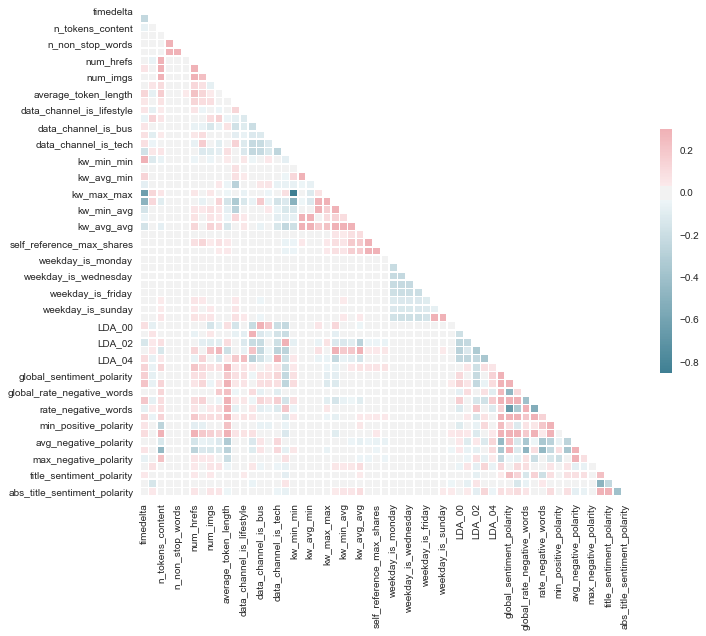

In [77]:
from string import ascii_letters

sns.set(style="white")

# Compute the correlation matrix
corr = Normalized_X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [124]:
cols = Normalized_X.columns
corr = Normalized_X.corr()
columnsNotNeeded = []
for i in range(len(corr)):
    for j in range(len(corr[cols[i]])):
        if abs(corr[cols[i]][cols[j]]) >= 0.6 and i != j:
            if(i not in columnsNotNeeded):
                print(cols[i], " and ", cols[j], " have corr = ", corr[cols[i]][cols[j]])
                columnsNotNeeded.append(cols[j])

timedelta  and  kw_max_max  have corr =  -0.637823910366592
n_unique_tokens  and  n_non_stop_words  have corr =  0.9995717371219179
n_unique_tokens  and  n_non_stop_unique_tokens  have corr =  0.9998515160178157
n_non_stop_words  and  n_unique_tokens  have corr =  0.9995717371219179
n_non_stop_words  and  n_non_stop_unique_tokens  have corr =  0.9995323282504545
n_non_stop_unique_tokens  and  n_unique_tokens  have corr =  0.9998515160178157
n_non_stop_unique_tokens  and  n_non_stop_words  have corr =  0.9995323282504545
data_channel_is_bus  and  LDA_00  have corr =  0.7746505220374882
data_channel_is_tech  and  LDA_04  have corr =  0.7497371213870785
data_channel_is_world  and  LDA_02  have corr =  0.8366182756595225
kw_min_min  and  kw_max_max  have corr =  -0.857226224643799
kw_max_min  and  kw_avg_min  have corr =  0.9405286635292287
kw_avg_min  and  kw_max_min  have corr =  0.9405286635292287
kw_max_max  and  timedelta  have corr =  -0.637823910366592
kw_max_max  and  kw_min_min  h

In [125]:
columnsNotNeeded = set(columnsNotNeeded)
len(columnsNotNeeded)

34

In [126]:
# len(Normalized_X.columns)
columnsNeeded=[]
for each in Normalized_X.columns:
    if each not in columnsNotNeeded:
        columnsNeeded.append(each)
columnsNeeded
len(columnsNeeded)

25

In [127]:
X_new = data[columnsNeeded]
X_new

,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,...,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,LDA_01,LDA_03,min_positive_polarity,max_negative_polarity,title_sentiment_polarity,abs_title_subjectivity
0,12.0,219.0,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.378279,0.041263,0.100000,-0.200000,-0.187500,0.000000
1,9.0,255.0,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.050047,0.050101,0.033333,-0.100000,0.000000,0.500000
2,9.0,211.0,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.033334,0.033334,0.100000,-0.133333,0.000000,0.500000
3,9.0,531.0,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.419300,0.028905,0.136364,-0.166667,0.000000,0.500000
4,13.0,1072.0,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.028794,0.028572,0.033333,-0.050000,0.136364,0.045455
5,10.0,370.0,2.0,2.0,0.0,0.0,4.359459,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.306718,0.022224,0.136364,-0.100000,0.214286,0.142857
6,8.0,960.0,21.0,20.0,20.0,0.0,4.654167,10.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.114705,0.020015,0.100000,-0.050000,0.000000,0.500000
7,12.0,989.0,20.0,20.0,20.0,0.0,4.617796,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.150733,0.022224,0.100000,-0.050000,0.500000,0.500000
8,11.0,97.0,2.0,0.0,0.0,0.0,4.855670,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.028979,0.029696,0.400000,-0.125000,0.000000,0.375000
9,10.0,231.0,4.0,1.0,1.0,1.0,5.090909,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.040000,0.040001,0.100000,-0.100000,0.000000,0.500000


In [128]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

In [129]:
# X_train
model1=LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [171]:
C_param_range = [0.001,0.01,0.1,1,10,100]
j=0
for i in C_param_range:
    model_penalized=LogisticRegression(C=i, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
    model_penalized.fit(X_train,y_train)
    Train_accuracy = model_penalized.score(X_train,y_train)
    print("train:",Train_accuracy)
    predicted=model_penalized.predict(X_test)
    probs = model_penalized.predict_proba(X_test)
    print ("Test accuracy using Logistic regression model:", metrics.accuracy_score(y_test, predicted))
j+=1
    
  


train: 0.5453333333333333
Test accuracy using Logistic regression model: 0.5428787624012107
train: 0.5975495495495495
Test accuracy using Logistic regression model: 0.5892887170001682
train: 0.6154594594594595
Test accuracy using Logistic regression model: 0.604674625861779
train: 0.6166486486486487
Test accuracy using Logistic regression model: 0.6066924499747772
train: 0.6166126126126126
Test accuracy using Logistic regression model: 0.6071128299983185
train: 0.6166126126126126
Test accuracy using Logistic regression model: 0.6066924499747772


In [131]:
Train_accuracy = model_penalized.score(X_train,y_train)
print("Train Accuracy using Logistic regression model:", Train_accuracy)

Train Accuracy using Logistic regression model: 0.6165045045045046


In [132]:
predicted=model_penalized.predict(X_test)
probs = model_penalized.predict_proba(X_test)
print ("Test accuracy using Logistic regression model:", metrics.accuracy_score(y_test, predicted))

Test accuracy using Logistic regression model: 0.6065242979653607


In [133]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[3160 2425]
 [2255 4054]]
             precision    recall  f1-score   support

          0       0.58      0.57      0.57      5585
          1       0.63      0.64      0.63      6309

avg / total       0.61      0.61      0.61     11894



In [134]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn_accuracy_train = knn.score(X_train, y_train)
print("KNN Accuracy on train set:", knn_accuracy_train)

knn_accuracy_test = knn.score(X_test, y_test)
print("KNN Accuracy on test set:", knn_accuracy_test)

KNN Accuracy on train set: 0.709009009009009
KNN Accuracy on test set: 0.540356482259963


In [139]:
from sklearn.model_selection import GridSearchCV
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [140]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 15}

In [141]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.5480720720720721

In [167]:
model2= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=70, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0,
            warm_start=False)
model2.fit(X_train, y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=70, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [168]:
random_predict_train=model2.predict(X_train)
random_predict_test= model2.predict(X_test)

In [169]:
print("Accuracy of the train set:", metrics.accuracy_score(y_train,random_predict_train))
print("Accuracy of the test set:", metrics.accuracy_score(y_test,random_predict_test))

Accuracy of the train set: 0.9771171171171171
Accuracy of the test set: 0.6314107953590046


In [174]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [175]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6232554229023037


In [176]:
from sklearn import svm

In [183]:
clf = svm.SVC(gamma='auto')
clf.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [185]:
print(clf.predict(X_test))

[1 1 1 ... 1 1 1]


In [187]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[3234 2351]
 [2130 4179]]
             precision    recall  f1-score   support

          0       0.60      0.58      0.59      5585
          1       0.64      0.66      0.65      6309

avg / total       0.62      0.62      0.62     11894



In [ ]:
svclassifier = svm.SVC(kern1el='linear')  
svclassifier.fit(X_train, y_train) 

In [ ]:
y_pred = svclassifier.predict(X_test) 

In [ ]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  